In [146]:
df = pd.read_excel('case_study.xlsx')
df = df.set_index('Date')
df.sample(5)

<IPython.core.display.Javascript object>

,VI,V2
Date,,
2019-11-28,0.0076,8.89
2019-12-18,0.0205,10.50
2019-11-14,0.0058,8.48
2019-10-31,0.0029,8.90
2019-12-02,0.0088,8.93


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

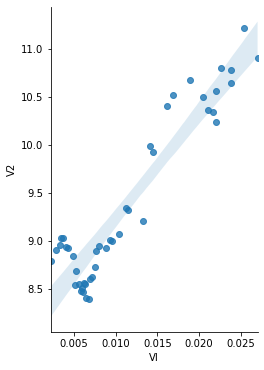

In [138]:
sns.pairplot(df, x_vars=['VI'], 
             y_vars='V2', height=5, aspect=0.7, kind='reg')
plt.show()

In [139]:
import statsmodels.api as sm
Y = df.V2
X = df.VI
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
(results.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     V2   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     313.4
Date:                Tue, 18 Aug 2020   Prob (F-statistic):           2.30e-21
Time:                        13:25:15   Log-Likelihood:                -9.3792
No. Observations:                  45   AIC:                             22.76
Df Residuals:                      43   BIC:                             26.37
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.1282      0.084     96.714      0.000       7.959       8.298
VI           110.4113      6.236     17.704      0.000      97.834     122.988
==============================================================================
Omnibus:                        8.677   Durbin-Watson:                   0.450
Prob(Omnibus):                  0.013   Jarque-Bera (JB):                3.697
Skew:                           0.431   Prob(JB):                        0.157
Kurtosis:                       1.892   Cond. No.                         137.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Influence plots
Influence plots show the (externally) studentized residuals vs. the leverage of each observation as measured by the hat matrix.

Externally studentized residuals are residuals that are scaled by their standard deviation

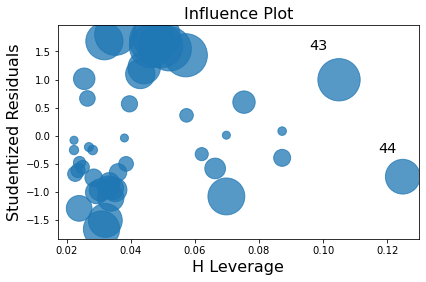

In [43]:
fig = sm.graphics.influence_plot(results, criterion="cooks")
fig.tight_layout(pad=1.0)

As you can see there are a few worrisome observations. Both contractor and reporter have low leverage but a large residual. RR.engineer has small residual and large leverage. Conductor and minister have both high leverage and large residuals, and, therefore, large influence.

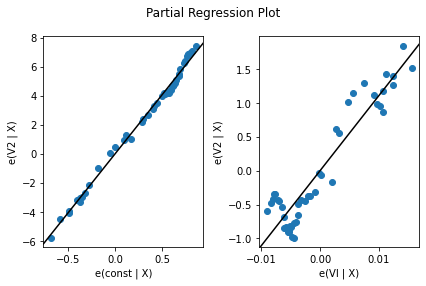

In [11]:
fig = sm.graphics.plot_partregress_grid(results)
fig.tight_layout(pad=1.0)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

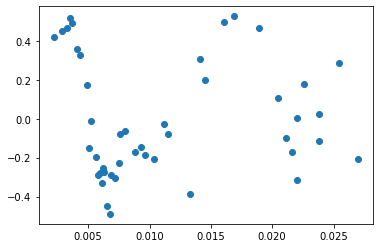

In [20]:
# plot 
plt.scatter(results.model.exog[:,1], results.resid)
plt.show()

In [44]:
# model values
model_fitted = results.fittedvalues
# model residuals
model_residuals = results.resid

# normalized residuals
normalized_residuals = results.get_influence().resid_studentized_internal

Residuals vs Fitted
First up is the Residuals vs Fitted plot. This graph shows if there are any nonlinear patterns in the residuals, and thus in the data as well. One of the mathematical assumptions in building an OLS model is that the data can be fit by a line. If this assumption holds and our data can be fit by a linear model, then we should see a relatively flat line when looking at the residuals vs fitted.

An example of this failing would be trying to fit the function 
f(x)= x2 with a linear regression y=β0 + β1x. Clearly, the relationship is nonlinear and thus the residuals have non-random patterns.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

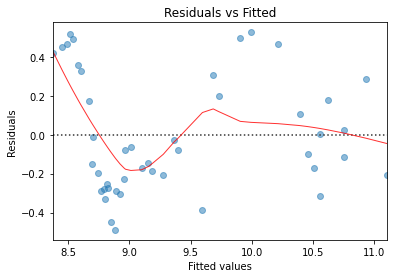

In [45]:
residuals = plt.figure()
residuals.axes[0] = sns.residplot(model_fitted, df.columns[-1], data=df,
                          lowess=True,scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

residuals.axes[0].set_title('Residuals vs Fitted')
residuals.axes[0].set_xlabel('Fitted values')
residuals.axes[0].set_ylabel('Residuals');

An ideal Residuals vs Fitted plot will look like random noise; there won’t be any apparent patterns in the scatterplot and the red line would be horizontal.

Notice the bow-shaped line in red? This is an indicator that we are failing to capture some of the non-linear features of the model. In other words, we are underfitting the model. Perhaps the variance in the data might be better captured using the square (or some other non-linear transformation) of the features. 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

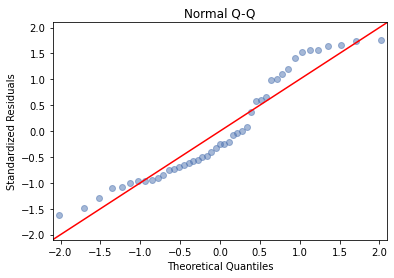

In [140]:
QQ = ProbPlot(normalized_residuals)
ols_plot = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
ols_plot.axes[0].set_title('Normal Q-Q')
ols_plot.axes[0].set_xlabel('Theoretical Quantiles')
ols_plot.axes[0].set_ylabel('Standardized Residuals');
# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]
for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i,
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   normalized_residuals[i]));

In [76]:
df.head()

,Date,VI,V2
0,2019-10-30,0.0022,8.79
1,2019-10-31,0.0029,8.90
2,2019-11-01,0.0033,8.96
3,2019-11-04,0.0035,9.03
4,2019-11-05,0.0037,9.03


### compute the residuals and other metrics
from statsmodels.stats.outliers_influence import OLSInfluence
influence = OLSInfluence(results)


In [147]:
# Fitting Linear Regression to the dataset 
from sklearn.linear_model import LinearRegression 

Y = df.V2
X = df.VI
# Fitting Linear Regression to the dataset 
lin = LinearRegression() 
lin.fit(X.values.reshape(-1,1), Y.values.reshape(-1,1))

LinearRegression()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

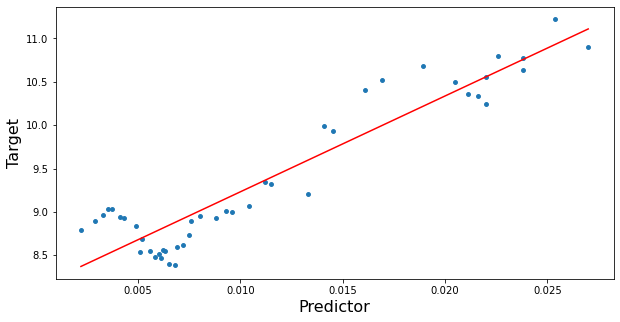

In [151]:
y_pred=lin.predict(X.values.reshape(-1,1))

# plotting predictions
plt.figure(figsize=(10,5))
plt.scatter(X,Y,s=15)
plt.plot(X,y_pred,color='r')
plt.xlabel('Predictor',fontsize=16)
plt.ylabel('Target',fontsize=16)
plt.show()

In [100]:
# for calculating mean_squared error
from sklearn.metrics import mean_squared_error
print('RMSE for Linear Regression=>',np.sqrt(mean_squared_error(Y,y_pred)))

<IPython.core.display.Javascript object>

RMSE for Linear Regression=> 0.29804447536748


In [129]:
# importing libraries for polynomial transform
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 6) 
X_poly = poly.fit_transform(X.values.reshape(-1,1)) 
  
poly.fit(X_poly, Y.values.reshape(-1,1))
lin2 = LinearRegression() 
lin2.fit(X_poly, Y.values.reshape(-1,1)) 

LinearRegression()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

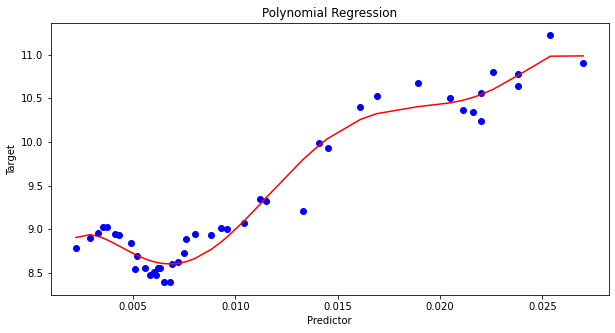

In [130]:
# Visualising the Polynomial Regression results 
plt.figure(figsize=(10,5))
plt.scatter(X, Y, color = 'blue') 
plt.plot(X, lin2.predict(poly.fit_transform(X.values.reshape(-1,1))), color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Predictor') 
plt.ylabel('Target') 
  
plt.show() 


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

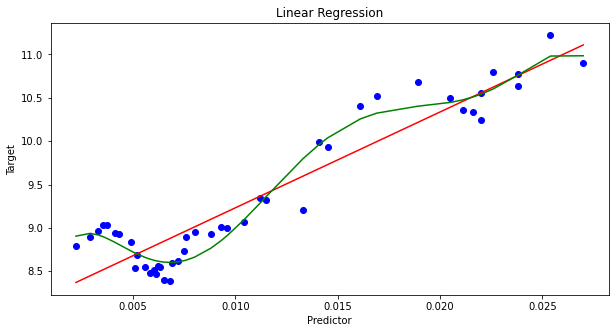

In [150]:
# Visualising the Linear Regression results 
plt.figure(figsize=(10,5))
plt.scatter(X, Y, color = 'blue') 
plt.plot(X, lin.predict(X.values.reshape(-1,1)), color = 'red')
plt.plot(X, lin2.predict(poly.fit_transform(X.values.reshape(-1,1))), color = 'green') 
plt.title('Linear Regression') 
plt.xlabel('Predictor') 
plt.ylabel('Target') 
  
plt.show()


In [131]:
ypred2=lin2.predict(X_poly)
print('RMSE for Linear Regression=>',np.sqrt(mean_squared_error(Y, ypred2)))

<IPython.core.display.Javascript object>

RMSE for Linear Regression=> 0.16762058673406513
